In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text) 
    tokens = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review', 'sentiment']].head()


,review,clean_review,sentiment
0,One of the other reviewers has mentioned that ...,reviewers mentioned watching just oz episode y...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive


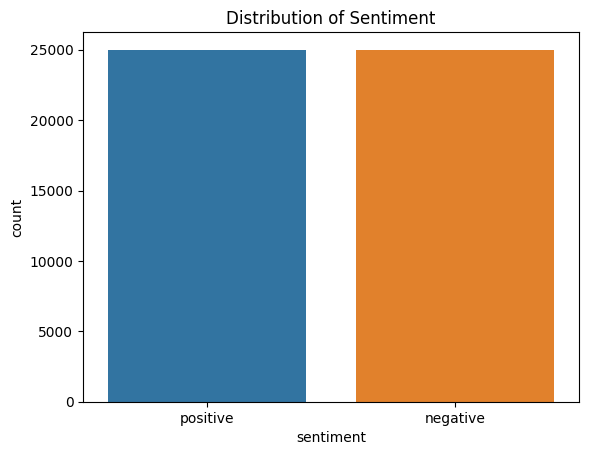

In [10]:
#eda and sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiment")
plt.show()


In [12]:
#text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#train the sentiment classifier
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



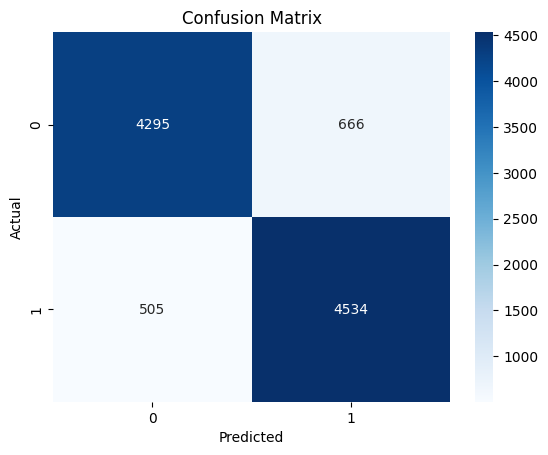

In [16]:
#evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#review example 1

sample_review = ["The movie was amazing."]
sample_review_clean = preprocess(sample_review[0])
sample_tfidf = vectorizer.transform([sample_review_clean])
print("Sentiment Prediction:", model.predict(sample_tfidf)[0])

Sentiment Prediction: 1


In [21]:
#review example 2

sample_review = ["The movie was too slow and boring."]
sample_review_clean = preprocess(sample_review[0])
sample_tfidf = vectorizer.transform([sample_review_clean])
print("Sentiment Prediction:", model.predict(sample_tfidf)[0])

Sentiment Prediction: 0
